## Проект по дисциплине "Сложность вычислений"


## Поиск максимальной клики в графе

  
**Автор: Зименков Александр**

### Описание проекта

В данном проекте рассмотрен алгоритм Брона-Кербоша и некоторые его улучшения для решения задачи поиска максимальной клики в графе.

Структура проекта:
1. Базовые определения, описание проблемы, ее сложность (NPC)
2. Описание алгоритма, его улучшений; сложность алгоритма, время работы
3. Реализация алгоритма на языке python
4. Тестирование различных вариантов алгоритма на различных графах, построение графиков для сравнения времени работы.
5. Выводы по работе
6. Использованная литература

### Основные понятия

Для понимания поставленной задачи дадим определения основным понятиям:
1. **Клика** -  подмножество вершин графа, любые две из которых соединены ребром.
2. **Максимальная клика** - клика, содержащая наибольшее количество вершин.
3. **Поиск максимальной клики** - нахождение всех максимальных клик в заданном графе. Назовем задачу CLIQUE.

Несмотря на простоту формулировки, данная задача является NP-полной. Доказательство этого факта совсем простое: докажем сводимость SAT к CLIQUE (SAT - NP-полная задача, поэтому из этой сводимости следует NP-полнота CLIQUE):
1. Каждую формулу представим в виде КНФ (полиномиальная длина от начальной формулы)
2. Представим формулу в виде графа:
    - каждая переменная в формуле - уникальная вершина
    - вершины соединены ребром тогда и только тогда, когда их переменные находятся в разных скобках в КНФ и переменные не являются противоположными (например, $x$ и $\overline x$ ребром соединены не будут)
3. Покажем сводимость: 
    - клика в таком графе не будет содержать больше одной вершины из получившихся из одной скобки вершин
    - пусть в КНФ m скобок. Тогда если максимальная клика содержит m вершин, то формула выполнима (если включен $\overline x$, то $x = 0$, иначе $x = 1$) 
    - если формула выполнима, то очевидным из построения графа образом можно найти клику размера m

Таким образом, показали NP-полноту задачи CLIQUE. Более подробное и формальное доказательство с картинками можно найти в используемой литературе.

### Алгоритмы для решения данной задачи

NP-полнота задачи не позволяет найти эффективное решение. Однако существуют достаточно быстрые алгоритмы поиска максимальной клики. Один из таких алгоритмов - алгоритм Брона-Кербоша. Рассмотрим обычный вариант этого алгоритма и некоторые его улучшения.

#### Обычный алгоритм Брона-Кербоша

Алгоритм использует тот факт, что всякая клика в графе является его максимальным по включению полным подграфом. Начиная с одиночной вершины (образующей полный подграф), алгоритм на каждом шаге пытается увеличить уже построенный полный подграф, добавляя в него вершины из множества кандидатов. Высокая скорость обеспечивается отсечением при переборе вариантов, которые заведомо не приведут к построению клики, для чего используется дополнительное множество, в которое помещаются вершины, которые уже были использованы для увеличения полного подграфа.

Алгоритм оперирует тремя множествами вершин графа:
- Множество compsub — множество, содержащее на каждом шаге рекурсии полный подграф для данного шага. Строится рекурсивно.
- Множество candidates — множество вершин, которые могут увеличить compsub
- Множество used — множество вершин, которые уже использовались для расширения compsub на предыдущих шагах алгоритма.

Алгоритм является рекурсивной процедурой, применяемой к этим трем множествам.

Псевдокод:

```
BronKerbosch(COMBSUM, CANDIDATES, USED):
1 if CANDIDATES is empty and USED is empty then
2    report COMBSUM as a maximal clique
3 for v in CANDIDATES do
4    BronKerbosch(COMBSUM ∪ v, CANDIDATES ∩ N(v), USED ∩ N(v))
5    CANDIDATES = CANDIDATES \ v
6    USED = USED ∪ v
```
N(v) - соседние вершины

#### Алгоритм Брона-Кербоша с DegeneracyOrdering"

Данный алгоритм очень похож на классический вариант. Отличие лишь в том, что CANDIDATES перебираются в порядке увеличения степени вершины. Такой порядок называется degeneracyordering. Он позволяет уменьшить размер CANDIDATES в рекурсивных вызовах, тем самым сократив время работы алгоритма. Такой порядок ищется за линейное время.

Псевдокод:

```
BronKerboschWithDegeneracyOrdering(COMBSUM, CANDIDATES, USED):
1 if CANDIDATES is empty and USED is empty then
2    report COMBSUM as a maximal clique
3 for v in degeneracyordering(CANDIDATES) do
4    BronKerbosch(COMBSUM ∪ v, CANDIDATES ∩ N(v), USED ∩ N(v))
5    CANDIDATES = CANDIDATES \ v
6    USED = USED ∪ v
```

#### Алгоритм Томиты

Алгоритм Томиты - улучшенный алгоритм Брона-Кербоша. Он построен на идее, что можно перебирать не все вершины из CANDIDATES. Для этого нужно найти вершину из CANDIDATES ∪ USED с наибольшим количеством соседей. Очевидно, что максимальная клика будет либо содержать такую вершину, либо не будет содержать ее соседей (если содержит соседа, то можно увеличить клику, добавив в нее саму вершину). Будем называть такую вершину pivot. Очевидно, что такой алгоритм будет работать быстрее на графах, в которых много не максимальных клик, ведь многие из них будут отброшены.

Псевдокод:

```
Tomita(COMBSUM, CANDIDATES, USED)
1 if CANDIDATES and USED are both empty then
2    report COMBSUM as a maximal clique
3 choose the pivot vertex u in CANDIDATES ∪ USED
4 for each vertex v in CANDIDATES \ N (u) do
5    Tomita(COMBSUM ∪ v, P ∩ N (v), USED ∩ N (v))
6    CANDIDATES = CANDIDATES \ v
7    USED = USED ∪ v
```

#### Алгоритм Томиты c DegeneracyOrdering

Данный алгоритм совмещает две идеи по улучшению базового алгоритма (обход по вершинам в порядке вырожденности и выбор вершины с наибольшим числом соседей).

### Реализация алгоритмов на языке python

Имплементация класса для поиска максимальных клик в графе находится в файле clique_solver.py (там достаточно много строк кода, не хочется загромождать ими ноутбук)

In [1]:
# импортируем нужный для тестирования качества решений класс

from clique_solver import CliqueSolver

Продемонстрируем возможности класса на простом примере:

In [4]:
# n - число вершин, p - вероятность появления ребра
solver = CliqueSolver(n=5, p=0.7)
solver.show_graph()
max_clique = solver.get_max_clique(method='tomita')
print('Максимальные клики:', max_clique)

[[1 1 0 1 1]
 [1 1 1 1 1]
 [0 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]
Максимальные клики: {frozenset({1, 2, 3, 4}), frozenset({0, 1, 3, 4})}


### Тестирование и визуализация результатов

Для оценки качества работы каждого из алгоритмов будем запускать их при разных p и n по 25 раз и смотреть средний результат, чтобы исключить выбросы. Оценивать будем следующие параметры:
- время работы
- количество рекурсивных вызовов
- корректность работы (сколько клик было найдено)

Испортируем необходимые библиотеки:

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as sts
import seaborn as sns
from time import time
import warnings

from collections import defaultdict
from itertools import combinations
from tqdm import tqdm

In [6]:
tests_number = 25

def test_and_show_results(n, p, methods):
    grid = np.arange(3, n)
    
    results = pd.DataFrame(index=grid, columns=methods, dtype=float)
    results = results.fillna(0)
    
    times = pd.DataFrame(index=grid, columns=methods, dtype=float)
    times = times.fillna(0)
    
    calls = pd.DataFrame(index=grid, columns=methods, dtype=int)
    calls = times.fillna(0)
    
    # get all results
    for n in tqdm(results.index):
        for i in range(tests_number):
            solver = CliqueSolver(n=n, p=p)
            for method in methods:
                start = time()
                solver.get_max_clique(method=method)
                end = time()
                results[method][n] += len(solver.max_clique)
                times[method][n] += end - start
                calls[method][n] += solver.calls_number
    
    # average values
    results = results / tests_number
    times = times / tests_number
    calls = calls / tests_number

    
    sns.set()
    plt.figure(figsize=(10, 8))
    plt.title(label=f'Average number of cliques found in graph with p = {p}',
              fontsize=20)
    plt.xlabel('Vertices number', fontsize=12)
    plt.ylabel('Cliques number', fontsize=12)
    
    for idx, method in enumerate(methods):
        plt.step(grid, results[method], label=method)
        plt.scatter(grid[-1 - idx], results[method][grid[-1 - idx]])
    plt.legend(loc='best', fontsize=15)
    plt.show()

    sns.set()
    plt.figure(figsize=(10, 8))
    plt.title(label=f'Average time for finding maximal cliques in graph with p = {p}',
              fontsize=20)
    plt.xlabel('Vertices number', fontsize=12)
    plt.ylabel('Time', fontsize=12)
    
    for idx, method in enumerate(methods):
        plt.step(grid, times[method], label=method)
        plt.scatter(grid[-1 - idx], times[method][grid[-1 - idx]])      
    plt.legend(loc='best', fontsize=15)
    plt.show()        

    sns.set()
    plt.figure(figsize=(10, 8))
    plt.title(label=f'Average number of calls in graph with p = {p}',
              fontsize=20)
    plt.xlabel('Vertices number', fontsize=12)
    plt.ylabel('Calls number', fontsize=12)
    
    # we don't need naive method for counting recursive calls
    if 'stupid' in methods:
        methods.remove('stupid')
    for idx, method in enumerate(methods):
        plt.step(grid, calls[method], label=method)
        plt.scatter(grid[-1 - idx], calls[method][grid[-1 - idx]])
    plt.legend(loc='best', fontsize=15)
    plt.show()
    
    return results, times, calls

Посмотрим на работу алгоритмов на случайных графах с p = 0.5

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]C:\Users\zimen\Desktop\МФТИ\5 семестр\сложности\проект\clique_solver.py:49: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.sum(self.graph[np.meshgrid(tuple(sub_graph),
100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.34it/s]


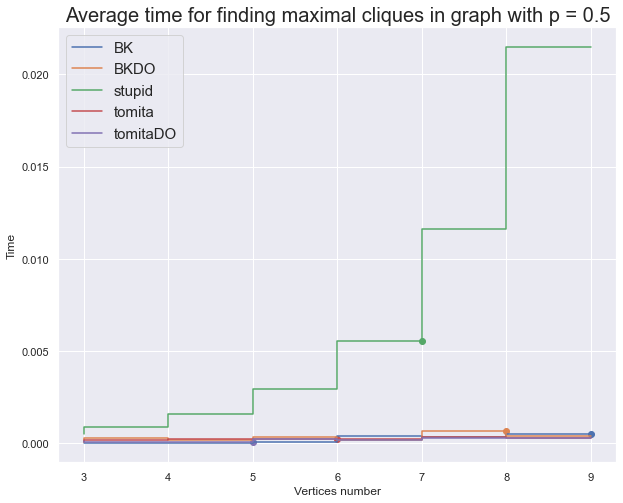

In [7]:
methods = ['BK', 'BKDO', 'stupid', 'tomita', 'tomitaDO']
results_1, times_1, calls_1 = test_and_show_results(10, 0.5, methods)

**Мини-вывод:** 
- Из первого графика видим, что Томита с DO - эвристический алгоритм и что он не находит все максимальные клики.
- Второй график указывает на то, что наивный алгоритм очень сильно проигрывает всем остальным по времени. Однако о взаимоположении других алгоритмах сказать ничего нельзя. Исключим наивный алгоритм из рассмотрения.
- Третий график говорит о том, что улучшения действительно сокращают количество рекурсивных вызовов в tomita и tomita c DO. Но улучшит ли это скорость?

100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:01<00:00, 10.83it/s]


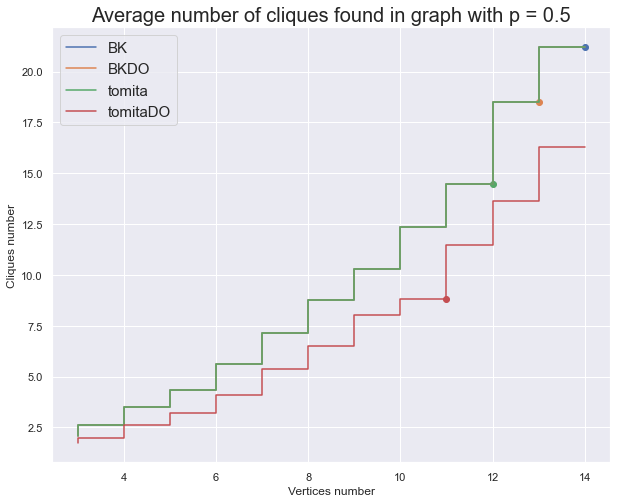

In [8]:
methods = ['BK', 'BKDO', 'tomita', 'tomitaDO']
results_2, times_2, calls_2 = test_and_show_results(15, 0.5, methods)

**Мини-вывод:** скорость алгоритма Томиты и Томиты с DO действительно выше, чем скорость обычных алгоритмов Брона-Кербоша. Однако эта разница на графах с p = 0.5 не особо ощутима. 

Рассмотрим почти полный граф:

100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:08<00:00,  1.38it/s]


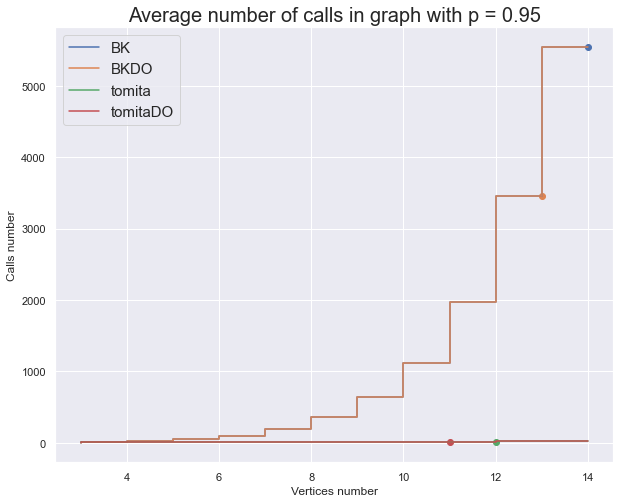

In [9]:
results_3, times_3, calls_3 = test_and_show_results(15, 0.95, methods)

**Мини-вывод:** а вот на почти полных графах скорость работы алгоритмов Томиты в тысячи раз больше. К тому же, время работы Томиты и Томиты с DO не особо различается, следовательно, чтобы не терять точность, на таких графах стоит использовать именно алгоритм Томиты.

Рассмотрим графы большего размера:

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [01:21<00:00,  1.94s/it]


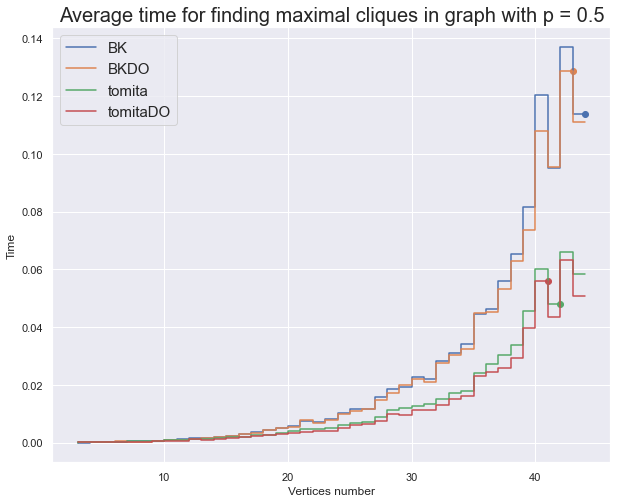

In [10]:
results_4, times_4, calls_4 = test_and_show_results(45, 0.5, methods)

**Мини-вывод:** можно сказать только то, что времена работы Томиты и Томиты с DO не особо различаются.

Интереса ради посмотрим на случайные графы с p = 0.2

100%|██████████████████████████████████████████████████████████████████████████████████| 37/37 [00:10<00:00,  3.59it/s]


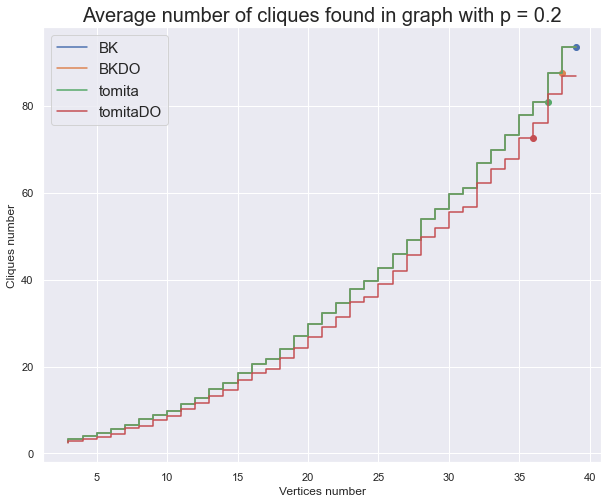

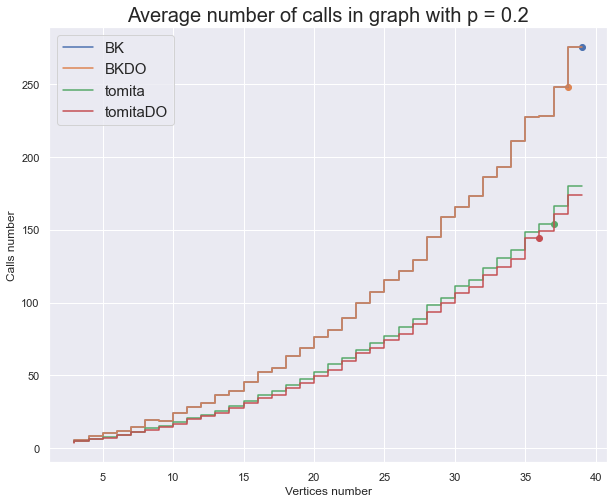

In [11]:
results_5, times_5, calls_5 = test_and_show_results(40, 0.2, methods)

**Мини-вывод:** интересно, что на таких графах алгоритмы Томиты проигрывают классическим вариантом. Возможно, это связано с тем, что издержки на нахождения пивота превышают выгоду на графах с небольшим количеством ребер. Проверим эту гипотезу:

100%|██████████████████████████████████████████████████████████████████████████████████| 37/37 [00:05<00:00,  7.20it/s]


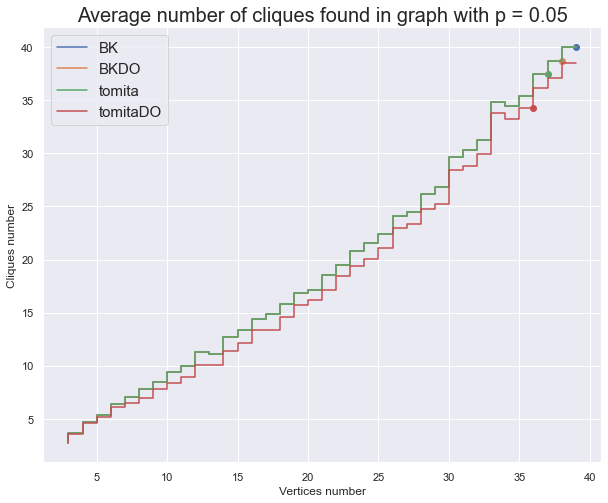

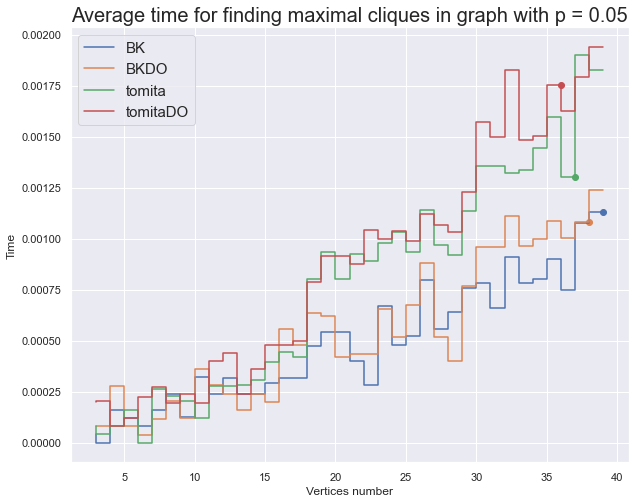

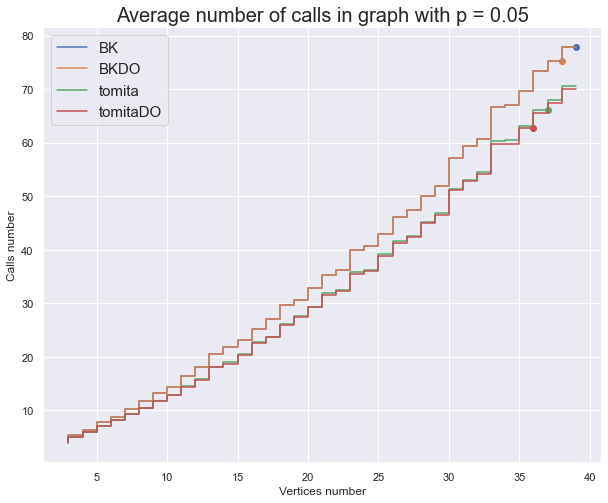

In [12]:
results_6, times_6, calls_6 = test_and_show_results(40, 0.05, methods)

**Мини-вывод:** да, наша гипотеза оказалась верна: на графах с маленьким количеством ребер алгоритмы Томиты уступают классическим в два раза.

### Выводы

1. Не существует (если P != NP) полиномиального решения задачи поиска максимальной клики, так как она NP-полная.
2. Существует множество различных быстрых алгоритмов решения данной задачи, например, алгоритм Брона-Кербоша и его улучшение - алгоритм Томиты.
3. Наивный алгоритм совсем не подходит для решения данной задачи: уже на графах размера 10 проигрывает остальным в тысячи раз.
4. Алгоритм Томиты с DO является самым быстрым на многих графах.
5. Однако алгоритм Томиты с DO является эвристическим, не находит все решения, несильно выигрывает обычный алгоритм Томиты.
6. На почти полных графах алгоритмы Томиты сильно (в тысячи раз) лучше обычных алгоритмов Брона-Кербоша.
7. На почти "пустых" графах алгоритмы Томиты проигрывают алгоритмам Брона-Кербоша из-за издержек на поиск пивота.

### Использованная литература

1. Bron C., Kerbosh J. (1973), Algorithm 457 — Finding all cliques of an undirected graph
2. Etsuji Tomita, Akira Tanaka, Haruhisa Takahashi (2006), The worst-case time complexity for generating all maximal cliques and computational experiments
3. Мусатов Д. (2019), Сложность вычислений - Классика и современность
4. [Видео с доказательством сведения SAT к MAXCLIQUE](https://www.youtube.com/watch?v=u3xNH6a1oa0&ab_channel=Udacity)
5. [Википедия - Алгоритм Брона-Кербоша](https://en.wikipedia.org/wiki/Bron%E2%80%93Kerbosch_algorithm)